### 500 HZ 70mVpp.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import numpy as np
import scipy
from scipy.optimize import curve_fit

#### load data

In [36]:
input_csv = "vidro-700Hz-70mBias2.csv"

df = pd.read_csv(input_csv, comment='#', names=['x', 'y', 'p', 't'])
df.head()

,x,y,p,t
0,630,432,0,6560
1,629,438,0,6560
2,630,439,0,6560
3,630,437,0,6560
4,631,442,0,6560


### Filter (small region just to calculate phase per pixel) and see the ROI


Number of data points: 652
            x    y  p        t
14078739  630  549  1  1100840
14078740  632  551  0  1100840
14078741  632  547  1  1100840
14078742  631  520  0  1100840
14078743  633  521  0  1100840
...       ...  ... ..      ...
14079397  632  410  0  1100890
14079398  630  446  0  1100890
14079399  628  447  0  1100890
14079400  631  447  0  1100890
14079401  628  435  1  1100890

[652 rows x 4 columns]
Time range: 1100840 to 1100890
Filtered data:
     x    y  p        t
0  630  549  1  1100840
1  632  551  0  1100840
2  632  547  1  1100840
3  631  520  0  1100840
4  633  521  0  1100840
Number of events: 652
Density array shape: (195608,)
Density indices shape: (652,)
Max density index: 154055
Min density index: 289
Densities size: 195608
Density indices (first 10): [152880 153664 152096 141512 141904 141904 143089 147401 147401 147401]


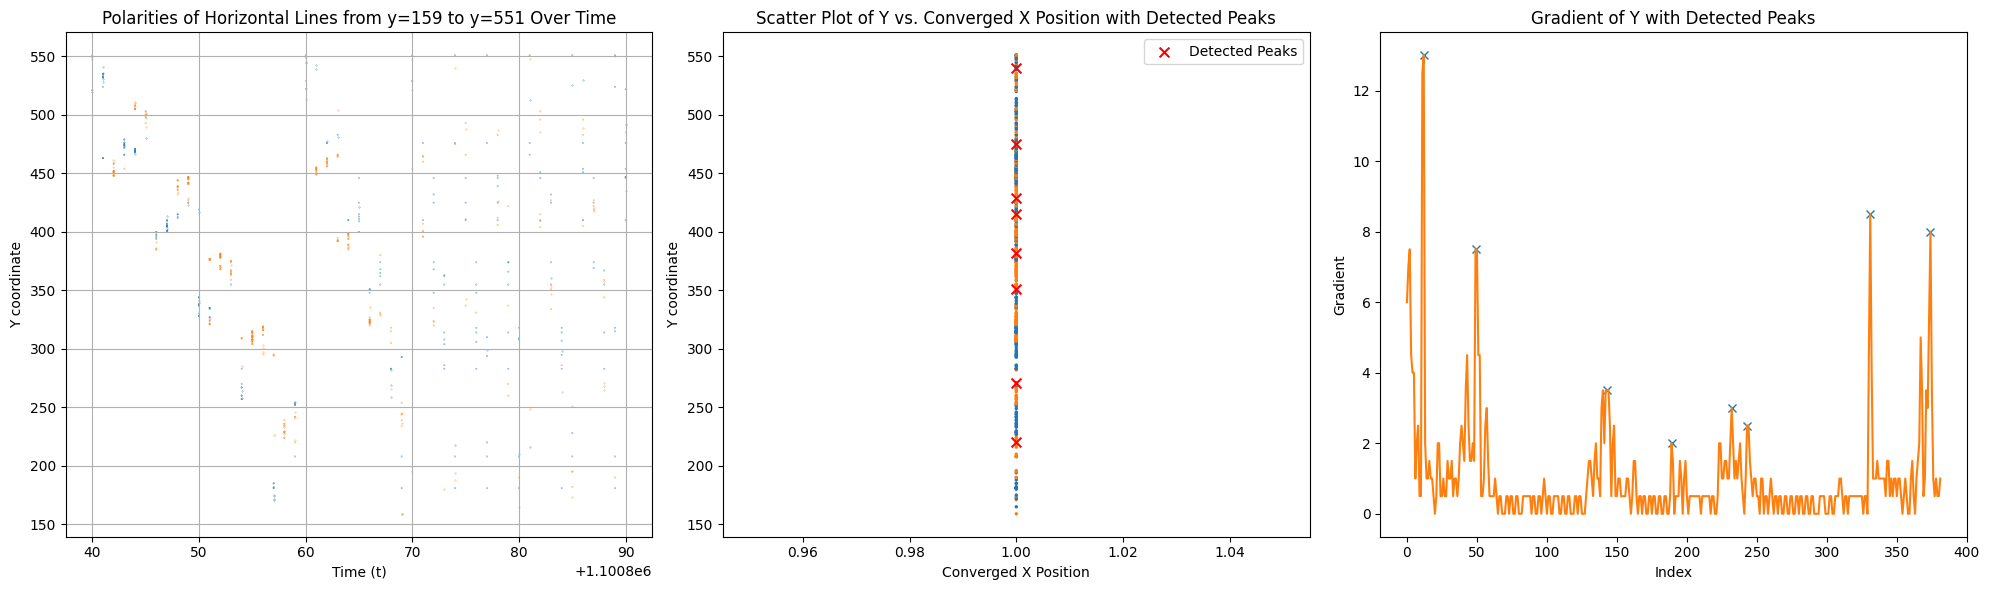

[220 271 351 382 415 429 475 540]


In [52]:
from polarityarea2 import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Define the parameters
tmin = 1100840
tmax = 1100890
ymin = 159
ymax = 551
xmin = 628
xmax = 633
polarity = None

# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()

# Sort the data based on y
x = line_df['x'].to_numpy()
y = line_df['y'].to_numpy()
t = line_df['t'].to_numpy()
p = line_df['p'].to_numpy()

idx = np.argsort(y)
x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

# Separate the data based on polarity
yp = y[p == 1]
yn = y[p == 0]

# Calculate the gradient of yp
gradyp = np.gradient(yp)

# Find peaks in the gradient of the y data for polarity = 1
peaksidx, _ = find_peaks(gradyp, distance=10, prominence=2)

# Create the ysplit and phisplit arrays
ysplit = yp[peaksidx]
phisplit = np.arange(0, 2 * np.pi * len(ysplit), 2 * np.pi)

# Create a subplot grid with 1 row and 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# First plot: Using plot_lines_polarity_over_time
plot_lines_polarity_over_time(input_csv, xmin, xmax, ymin, ymax, tmin, tmax, polarity, ax=ax1)

# Second plot: Scatter plot of y vs. position (converged x)
colors = ["C0", "C1"]
colors_vec = [colors[p] for p in line_df['p']]

# Set all x positions to the same value (e.g., 1) to align them vertically
converged_x = np.ones(len(t))
ax2.scatter(converged_x, y, s=2, c=colors_vec)

# Overlay the detected peaks on the scatter plot
ax2.scatter(converged_x[peaksidx], yp[peaksidx], s=50, c="red", marker="x", label="Detected Peaks")

# Configure labels and title for the second plot
ax2.set_xlabel('Converged X Position')
ax2.set_ylabel('Y coordinate')
ax2.set_title('Scatter Plot of Y vs. Converged X Position with Detected Peaks')
ax2.legend()

# Third plot: Gradient of y with peaks
ax3.plot(peaksidx, abs(gradyp[peaksidx]), "x")
ax3.plot(gradyp)
ax3.set_title('Gradient of Y with Detected Peaks')
ax3.set_xlabel('Index')
ax3.set_ylabel('Gradient')

plt.tight_layout()
plt.show()

print(ysplit)


In [53]:
phisplit

array([ 0.        ,  6.28318531, 12.56637061, 18.84955592, 25.13274123,
       31.41592654, 37.69911184, 43.98229715])

[0.         0.12319971 0.24639942 0.36959914 0.49279885 0.61599856
 0.73919827 0.86239798 0.9855977  1.10879741 1.23199712 1.35519683
 1.47839654 1.60159625 1.72479597 1.84799568 1.97119539 2.0943951
 2.21759481 2.34079453 2.46399424 2.58719395 2.71039366 2.83359337
 2.95679309 3.0799928  3.20319251 3.32639222 3.44959193 3.57279165
 3.69599136 3.81919107 3.94239078 4.06559049 4.1887902  4.31198992
 4.43518963 4.55838934 4.68158905 4.80478876 4.92798848 5.05118819
 5.1743879  5.29758761 5.42078732 5.54398704 5.66718675 5.79038646
 5.91358617 6.03678588 6.1599856  0.         0.07853982 0.15707963
 0.23561945 0.31415927 0.39269908 0.4712389  0.54977871 0.62831853
 0.70685835 0.78539816 0.86393798 0.9424778  1.02101761 1.09955743
 1.17809725 1.25663706 1.33517688 1.41371669 1.49225651 1.57079633
 1.64933614 1.72787596 1.80641578 1.88495559 1.96349541 2.04203522
 2.12057504 2.19911486 2.27765467 2.35619449 2.43473431 2.51327412
 2.59181394 2.67035376 2.74889357 2.82743339 2.9059732  2.98451

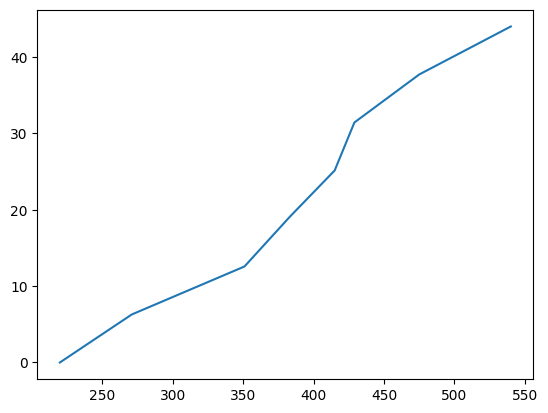

In [54]:
yroi = np.arange(ysplit[0], ysplit[-1] + 1)
phiroi = np.interp(yroi, ysplit, phisplit)
plt.plot(yroi, phiroi)
phiroi = np.mod(phiroi, 2 * np.pi) #between 0,2pi
print(phiroi)

### filter data (main data- bigger time period)

In [55]:
%matplotlib inline
# Define the parameters
tmin = 100000
tmax = 2000000
ymin = yroi[0]
ymax = yroi[-1]


# Filter the DataFrame for the specified horizontal line of pixels
line_df = df[(df['x'] >= xmin) & (df['x'] <= xmax) & (df['y'] >= ymin) & (df['y'] <= ymax)]

# Apply time filtering if specified
if tmin is not None:
    line_df = line_df[line_df['t'] >= tmin]
if tmax is not None:
    line_df = line_df[line_df['t'] <= tmax]

# Check if the filtered DataFrame is empty
if line_df.empty:
    print("No data points found for the given filters.")
else:
    print(f"Number of data points: {len(line_df)}")
    print(line_df)
    print(f"Time range: {line_df['t'].min()} to {line_df['t'].max()}")
    line_df.head()


Number of data points: 20634415
            x    y  p        t
1200733   629  390  0   100000
1200734   630  384  0   100000
1200735   633  385  0   100000
1200736   628  386  0   100000
1200737   632  410  0   100000
...       ...  ... ..      ...
25647636  628  249  0  1999998
25647637  631  249  0  1999998
25647638  633  254  0  1999998
25647639  628  252  0  1999999
25647648  632  221  1  1999999

[20634415 rows x 4 columns]
Time range: 100000 to 1999999


### phase per pixel method application

yp: [194 192 192 ...  72  74   1]
phase: [6.09278575 5.71198664 5.71198664 ... 1.64933614 1.80641578 0.12319971]
9605396
9605396


(0.0, 5000.0)

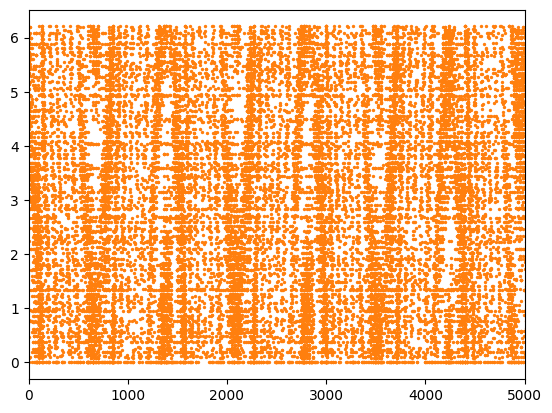

In [56]:

colors = ["C0", "C1"]

colors_vec = [colors[p] for p in line_df['p']]
x = line_df['x']
p = line_df['p']
t = line_df['t']
y = line_df['y']

x = np.array(x)
y = np.array(y)
p = np.array(p)
t = np.array(t)

idx = np.argsort(t)

x = x[idx]
y = y[idx]
t = t[idx]
p = p[idx]

t = t-t[0]

yp = y[p==1]
tp = t[p==1]
yn = y[p==0]

tp = tp-tp[0]

yp = yp-ymin

phase = np.array([phiroi[yi] for yi in yp])

print("yp:", yp)
#print("phiroi:", phiroi[180])
print("phase:", phase)
##yp = np.mod(yp, pixels_per_period)
#yp = np.mod(yp, 84)

tp_uniques = np.unique(tp)

##phase = yp*phaseperpixel
print(len(tp))
print(len(phase))
plt.scatter(tp, phase, s=2, c="C1")
plt.xlim(0,5000)

### Calculation of phase (centroids)

In [57]:
tp_uniques = np.unique(tp)
centroid_y = []
tval_vec = []

for i,tval in enumerate(tp_uniques):
    yval = phase[tp==tval]
    ycomplex = np.cos(yval)+1j*np.sin(yval)

    ymean = np.angle(np.mean(ycomplex))

    
    #print(i, ymean)
    centroid_y.append(ymean)
    tval_vec.append(tval)

    if i > 5500:
        break

centroid_y = np.array(centroid_y)
tval_vec = np.array(tval_vec)


In [58]:
centroid_y,tval_vec

(array([-0.76335558, -1.94055325, -0.23791648, ..., -2.85599332,
         0.38665756, -1.90399555]),
 array([   0,    1,    2, ..., 6676, 6679, 6680], dtype=int64))

### phases of events over time

(0.0, 2000.0)

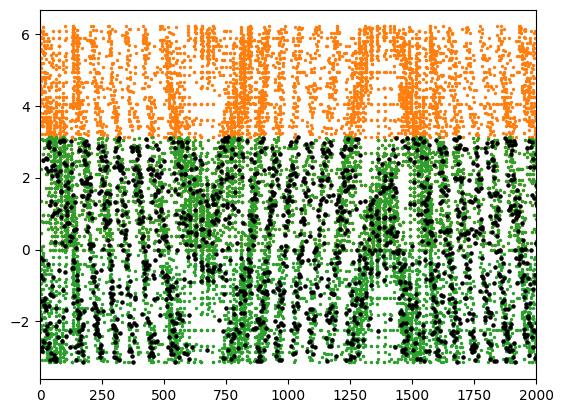

In [59]:
plt.scatter(tp, phase, s=2, c="C1")
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.xlim(0,2000)

### plot of the real and imaginary parts of complex numbers representing phase centroids

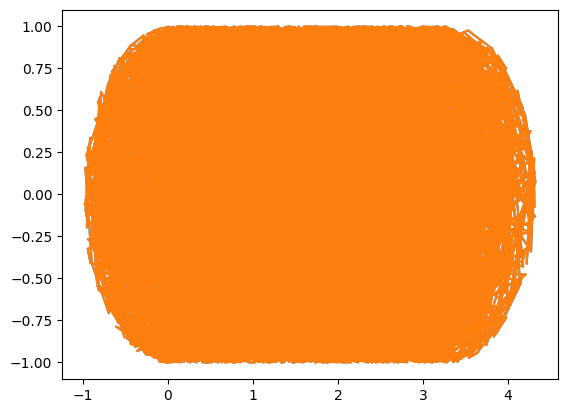

In [60]:
phase_complex = np.cos(centroid_y)+1j*np.sin(centroid_y)

#phase_complex = phase_complex[:100]

plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')
plt.plot(phase_complex.real+tval_vec/2000, phase_complex.imag, '-')


### Kalman filter to smooth the phase data derived from the centroid phases

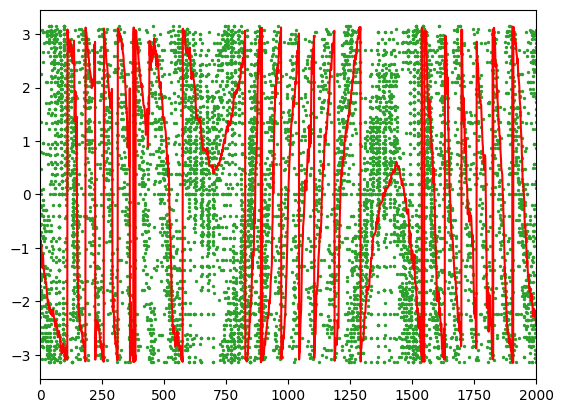

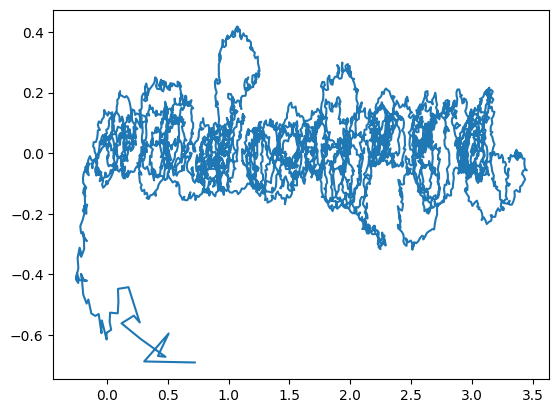

In [61]:
from kalman import KalmanTracking


Track = KalmanTracking()
Track.cov = 0.5 #Sets the initial covariance, representing the uncertainty in the initial state estimate.
Track.error_proc = 0.0001 #Sets the estimated process error, representing how much you expect the process to vary between steps.
Track.error_measurement = 0.3+0.3j #Sets the estimated measurement error, which includes both real and imaginary components.

complex_kalman = np.array([Track(c) for c in phase_complex])
phase_kalman = np.angle(complex_kalman)
#plt.plot(phase_complex.real+tval_vec/10000, phase_complex.imag, '.')
#plt.plot(phase_kalman.real+tval_vec/10000, phase_kalman.imag, '.')


plt.figure()
plt.scatter(tp, np.mod(phase+np.pi, 2*np.pi)-np.pi, s=2, c="C2")
#plt.scatter(tval_vec, centroid_y, s=5, c="k")
plt.plot(tval_vec, phase_kalman, c="r")
plt.xlim(0,2000)

plt.figure()
plt.plot(complex_kalman.real+tval_vec/2000, complex_kalman.imag, '-')


12.342587702846595

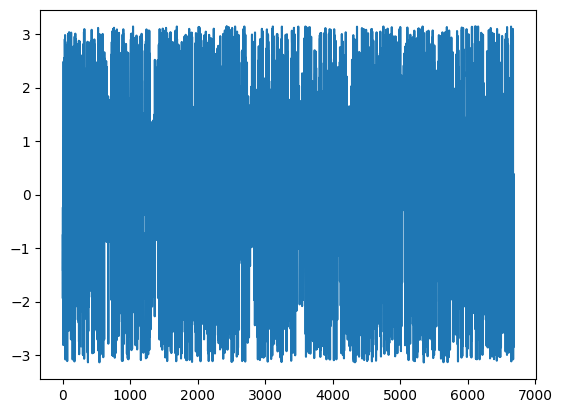

In [62]:
plt.plot(tval_vec, centroid_y)




np.ptp(np.diff(centroid_y)).max()


### Phase Unwrapping and Continuous Phase Analysis


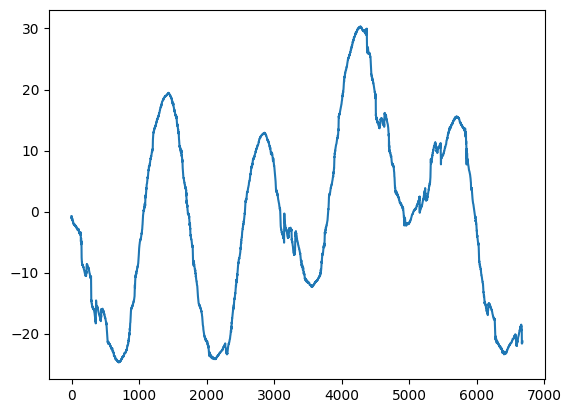

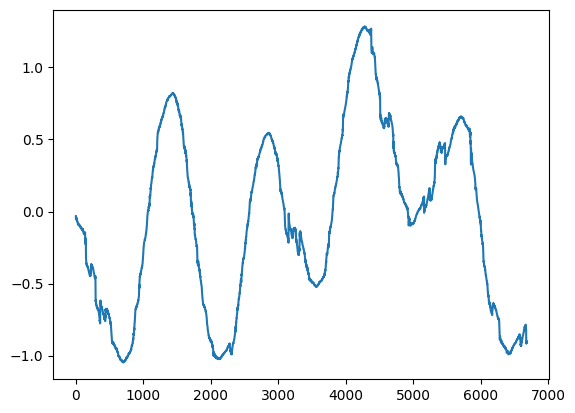

In [63]:
wavelength = 532e-9
centroid_y = np.unwrap(centroid_y)
centroid_y = np.unwrap(phase_kalman)

diff_phase = centroid_y - np.append([centroid_y[0]], np.diff(centroid_y))
plt.plot(tval_vec, centroid_y)
#plt.plot(tval_vec, diff_phase)
z = centroid_y/(2*np.pi)*wavelength/2

plt.figure()
plt.plot(tval_vec, z/1e-6)


### Displacement calc (nano)

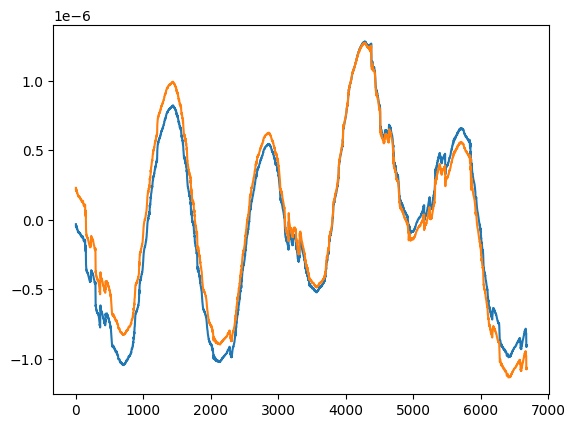

In [64]:
t_step = 1

t_interp = np.arange(tval_vec.min(), tval_vec.max(), t_step)
z_interp = np.interp(t_interp, tval_vec, z)

plt.plot(t_interp, z_interp)

z_detrend = scipy.signal.detrend(z_interp)
plt.plot(t_interp, z_detrend)


### FFT for finding main frequency of the signal

(0.0, 4000.0)

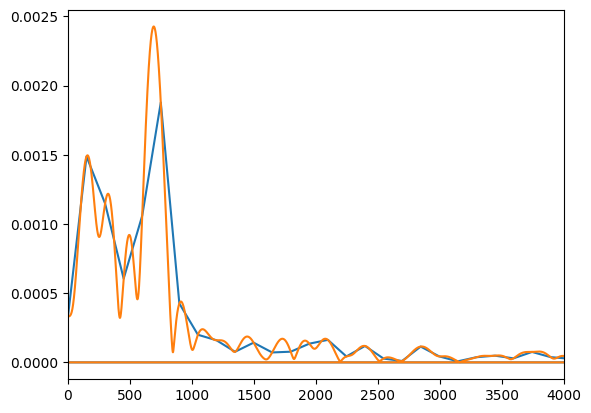

In [65]:
a = np.pad(z_interp, len(z_interp)*2)
a = np.pad(z_interp, 2**20-1)


ft = np.fft.fft(z_interp)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

ft = np.fft.fft(a)
freqs = np.fft.fftfreq(len(ft), d=t_step*1e-6)

plt.plot(freqs, np.abs(ft))

plt.xlim(0, 4000)

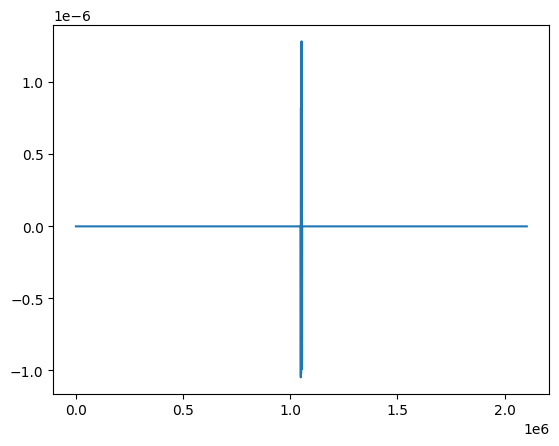

In [66]:
#a = np.pad(z_interp, len(z_interp)*2)

plt.plot(a)